<a href="https://colab.research.google.com/github/fiyoriyD/csci-164/blob/main/winequalitydataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from google.colab import drive


drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')
# --- Load Data ---
red = pd.read_csv('/content/drive/MyDrive/datas/winequality-red.csv', sep=';')
white = pd.read_csv('/content/drive/MyDrive/datas/winequality-white.csv', sep=';')

# --- Check for missing data ---
print("Red Wine Missing Values:\n", red.isnull().sum())
print("\nWhite Wine Missing Values:\n", white.isnull().sum())
#quick check
print("Red Wine Shape:", red.shape)
print("White Wine Shape:", white.shape)

#show frist few rows
print(red.head())
print(white.head())

Mounted at /content/drive
Red Wine Missing Values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

White Wine Missing Values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Red Wine Shape: (1599, 12)
White Wine Shape: (4898, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00          


After Outlier Removal:
Red wine shape: (1527, 12)
White wine shape: (4774, 12)


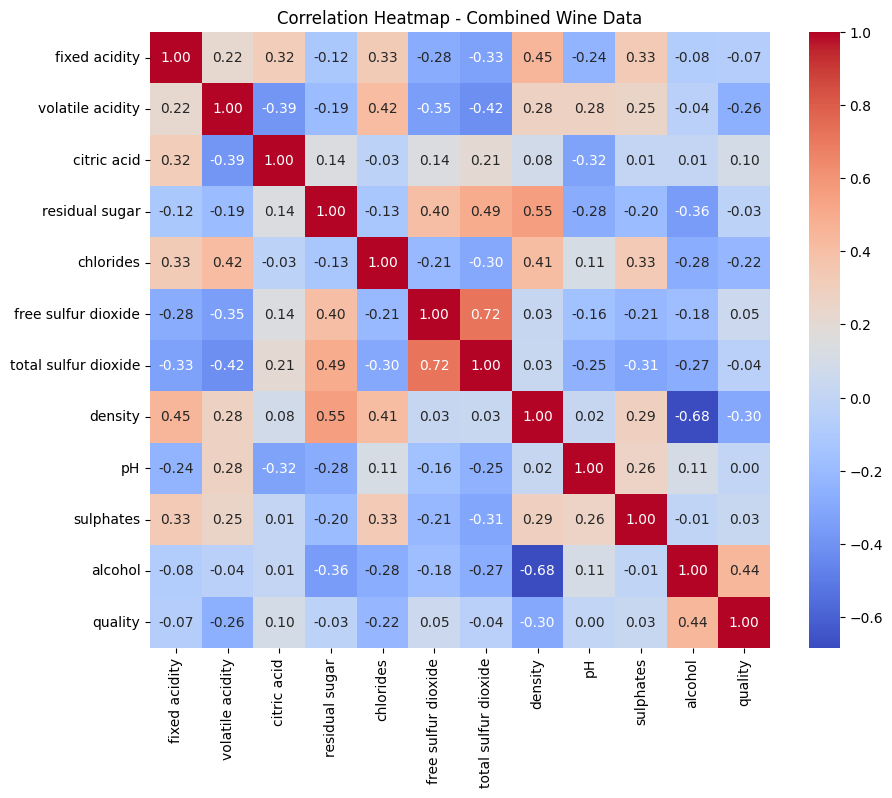

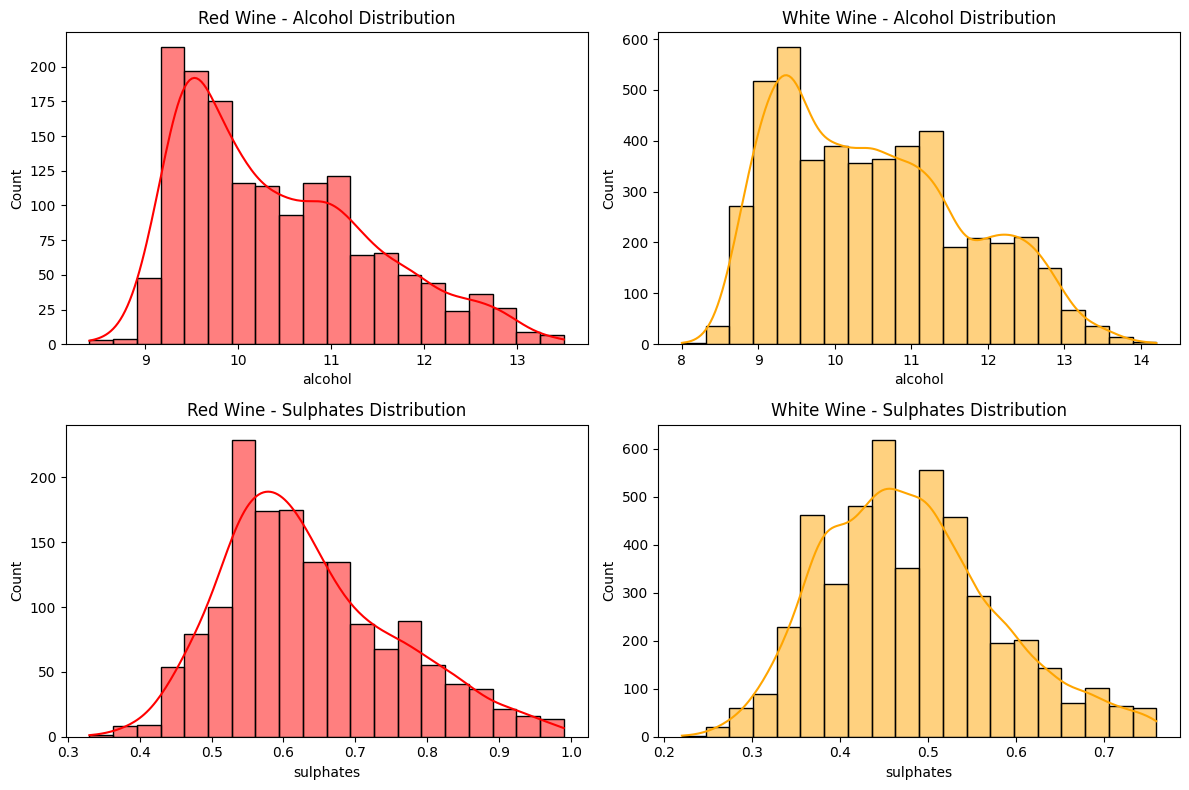

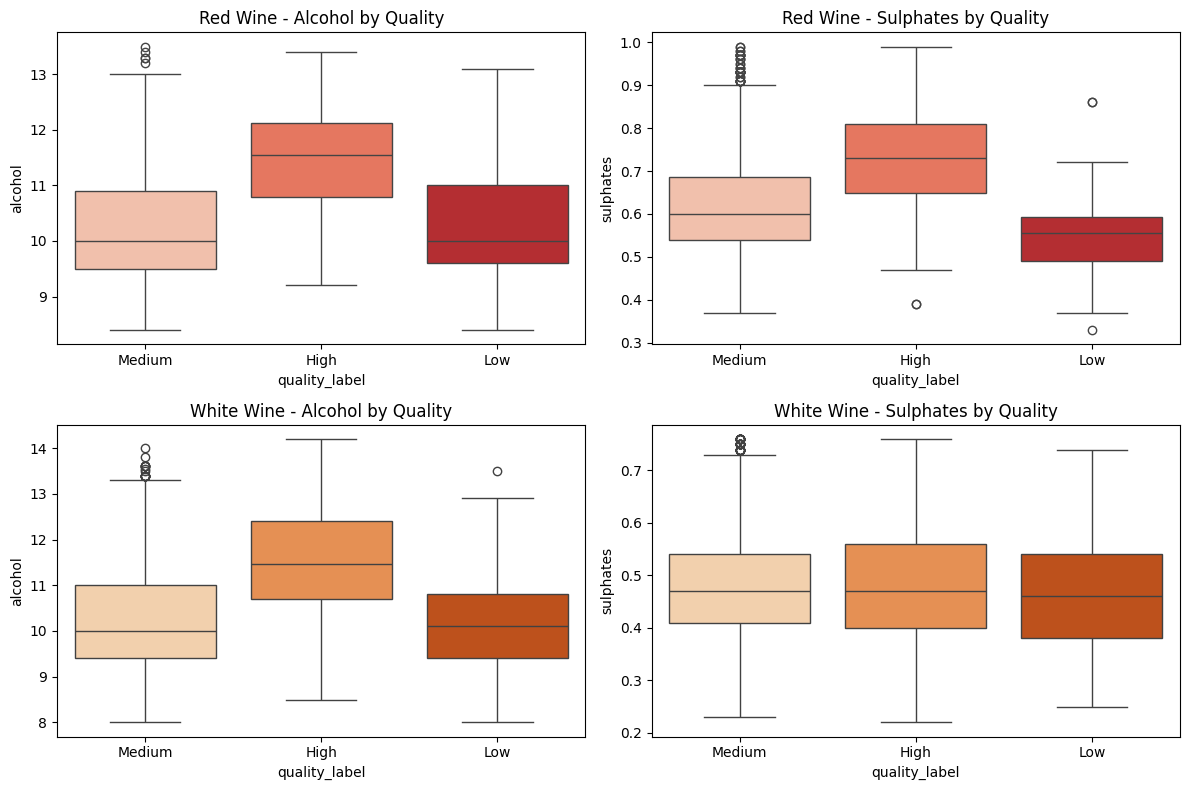


Red Wine class distribution (after categorization):
 quality_label
Medium    1267
High       200
Low         60
Name: count, dtype: int64
White Wine class distribution (after categorization):
 quality_label
Medium    3581
High      1014
Low        179
Name: count, dtype: int64

Red Wine class distribution after SMOTE:
 quality_label
Medium    1267
High      1267
Low       1267
Name: count, dtype: int64
White Wine class distribution after SMOTE:
 quality_label
Medium    3581
High      3581
Low       3581
Name: count, dtype: int64


In [4]:
# Import libraries
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
# --- Step 1: Outlier Removal (IQR) ---
def remove_outliers_iqr(df, features):
    df_clean = df.copy()
    for feature in features:
        Q1 = df_clean[feature].quantile(0.25)
        Q3 = df_clean[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[feature] >= lower_bound) & (df_clean[feature] <= upper_bound)]
    return df_clean

features = ['alcohol', 'sulphates']
red_clean = remove_outliers_iqr(red, features)
white_clean = remove_outliers_iqr(white, features)

print("\nAfter Outlier Removal:")
print("Red wine shape:", red_clean.shape)
print("White wine shape:", white_clean.shape)

# --- Correlation Heatmap ---
wine_combined = pd.concat([red_clean, white_clean], axis=0)
numeric_cols = wine_combined.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - Combined Wine Data')
plt.show()

# --- Histograms (Alcohol & Sulphates) ---
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(red_clean['alcohol'], bins=20, kde=True, ax=axes[0, 0], color='red')
axes[0, 0].set_title('Red Wine - Alcohol Distribution')
sns.histplot(white_clean['alcohol'], bins=20, kde=True, ax=axes[0, 1], color='orange')
axes[0, 1].set_title('White Wine - Alcohol Distribution')
sns.histplot(red_clean['sulphates'], bins=20, kde=True, ax=axes[1, 0], color='red')
axes[1, 0].set_title('Red Wine - Sulphates Distribution')
sns.histplot(white_clean['sulphates'], bins=20, kde=True, ax=axes[1, 1], color='orange')
axes[1, 1].set_title('White Wine - Sulphates Distribution')
plt.tight_layout()
plt.show()

# --- Boxplots (Alcohol & Sulphates vs. Quality Labels) ---
# Categorize quality for boxplots
def categorize_quality(value):
    if 3 <= value <= 4:
        return 'Low'
    elif 5 <= value <= 6:
        return 'Medium'
    else:
        return 'High'

red_clean['quality_label'] = red_clean['quality'].apply(categorize_quality)
white_clean['quality_label'] = white_clean['quality'].apply(categorize_quality)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x='quality_label', y='alcohol', data=red_clean, ax=axes[0, 0], palette='Reds')
axes[0, 0].set_title('Red Wine - Alcohol by Quality')
sns.boxplot(x='quality_label', y='sulphates', data=red_clean, ax=axes[0, 1], palette='Reds')
axes[0, 1].set_title('Red Wine - Sulphates by Quality')
sns.boxplot(x='quality_label', y='alcohol', data=white_clean, ax=axes[1, 0], palette='Oranges')
axes[1, 0].set_title('White Wine - Alcohol by Quality')
sns.boxplot(x='quality_label', y='sulphates', data=white_clean, ax=axes[1, 1], palette='Oranges')
axes[1, 1].set_title('White Wine - Sulphates by Quality')
plt.tight_layout()
plt.show()

# --- Class Distribution After Categorization ---
print("\nRed Wine class distribution (after categorization):\n", red_clean['quality_label'].value_counts())
print("White Wine class distribution (after categorization):\n", white_clean['quality_label'].value_counts())

# --- Step 3: SMOTE Balancing ---
X_red_clean = red_clean[['alcohol', 'sulphates']]
y_red_clean = red_clean['quality_label']
X_white_clean = white_clean[['alcohol', 'sulphates']]
y_white_clean = white_clean['quality_label']

smote = SMOTE(random_state=42)
X_red_balanced, y_red_balanced = smote.fit_resample(X_red_clean, y_red_clean)
X_white_balanced, y_white_balanced = smote.fit_resample(X_white_clean, y_white_clean)

print("\nRed Wine class distribution after SMOTE:\n", pd.Series(y_red_balanced).value_counts())
print("White Wine class distribution after SMOTE:\n", pd.Series(y_white_balanced).value_counts())


In [5]:
from sklearn.model_selection import train_test_split

# --- Red Wine Split ---
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_red_balanced, y_red_balanced, test_size=0.2, random_state=42, stratify=y_red_balanced
)

# --- White Wine Split ---
Xw_train, Xw_test, yw_train, yw_test = train_test_split(
    X_white_balanced, y_white_balanced, test_size=0.2, random_state=42, stratify=y_white_balanced
)

# --- Check shapes ---
print("Red Wine - Train shape:", Xr_train.shape, yr_train.shape)
print("Red Wine - Test shape:", Xr_test.shape, yr_test.shape)

print("White Wine - Train shape:", Xw_train.shape, yw_train.shape)
print("White Wine - Test shape:", Xw_test.shape, yw_test.shape)


Red Wine - Train shape: (3040, 2) (3040,)
Red Wine - Test shape: (761, 2) (761,)
White Wine - Train shape: (8594, 2) (8594,)
White Wine - Test shape: (2149, 2) (2149,)



=== KNN GridSearchCV - Red Wine ===
Best k-NN Params - Red: {'metric': 'manhattan', 'n_neighbors': 27, 'weights': 'distance'}
Best Accuracy Score (CV) - Red: 0.8085526315789474
Test Accuracy - Red: 0.80946123521682
Test F1 Score - Red: 0.8082378180351738
Classification Report - Red:
               precision    recall  f1-score   support

        High       0.80      0.86      0.83       253
         Low       0.84      0.85      0.84       254
      Medium       0.79      0.72      0.75       254

    accuracy                           0.81       761
   macro avg       0.81      0.81      0.81       761
weighted avg       0.81      0.81      0.81       761

Confusion Matrix - Red:
 [[218  17  18]
 [  8 216  30]
 [ 47  25 182]]

=== KNN GridSearchCV - White Wine ===
Best k-NN Params - White: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best Accuracy Score (CV) - White: 0.7264369123830692
Test Accuracy - White: 0.7529083294555607
Test F1 Score - White: 0.754567492430

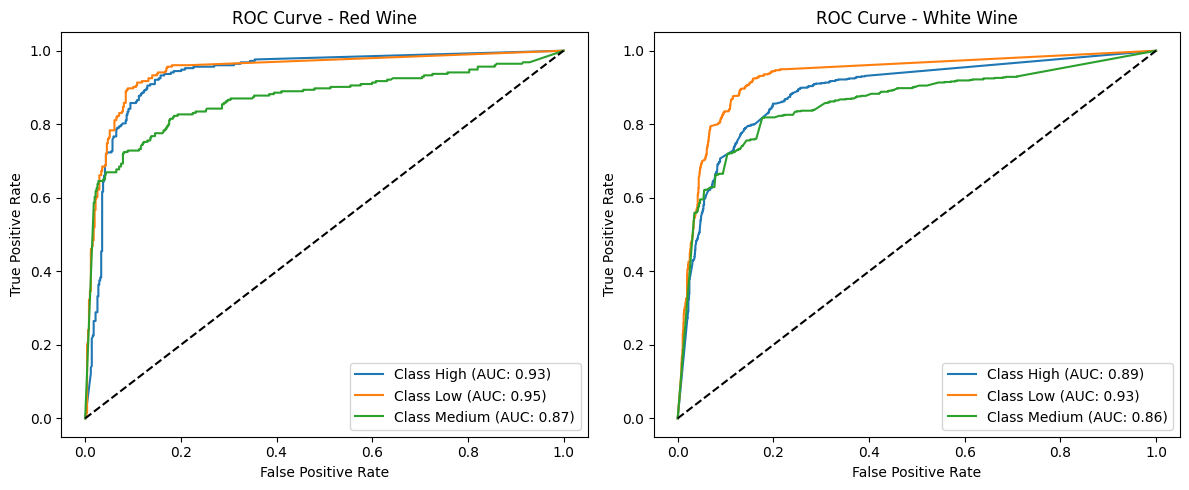

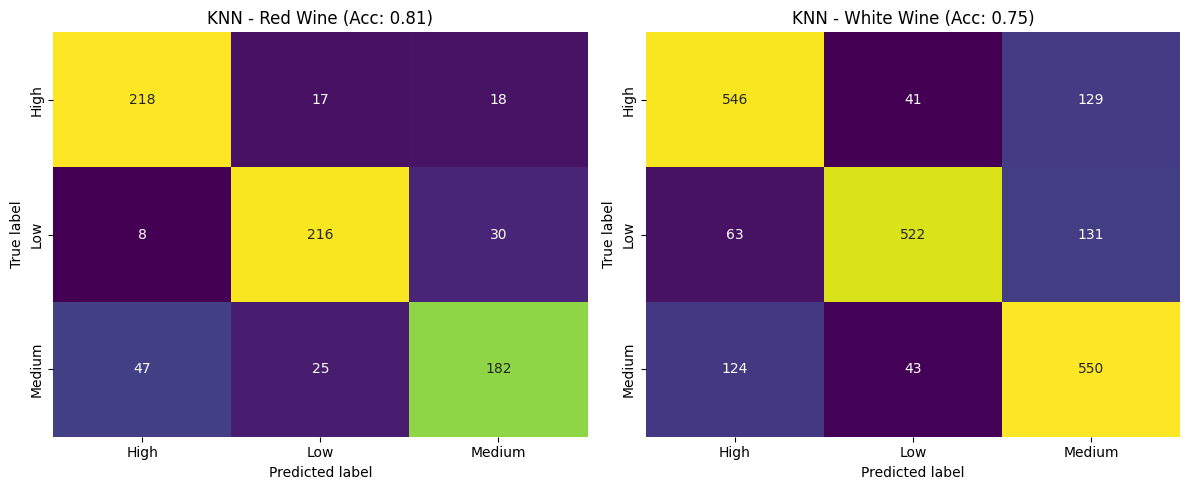

In [7]:
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import (
    classification_report, confusion_matrix, f1_score, ConfusionMatrixDisplay,
    roc_auc_score, RocCurveDisplay
)
import numpy as np


# --- DATA SPLIT ---
# Assuming Xr_train, Xr_test, yr_train, yr_test (red wine) and Xw_train, Xw_test, yw_train, yw_test (white wine) are ready

# --- SCALING ---
scaler_red = StandardScaler()
Xr_train_scaled = scaler_red.fit_transform(Xr_train)
Xr_test_scaled = scaler_red.transform(Xr_test)
#white
scaler_white = StandardScaler()
Xw_train_scaled = scaler_white.fit_transform(Xw_train)
Xw_test_scaled = scaler_white.transform(Xw_test)

# --- GridSearch Parameters ---
knn_params = {
    'n_neighbors': list(range(1, 51, 2)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# --- RED WINE ---
print("\n=== KNN GridSearchCV - Red Wine ===")
grid_knn_red = GridSearchCV(KNeighborsClassifier(), knn_params, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
grid_knn_red.fit(Xr_train_scaled, yr_train)

best_knn_red = grid_knn_red.best_estimator_
y_pred_knn_red = best_knn_red.predict(Xr_test_scaled)
cm_knn_red = confusion_matrix(yr_test, y_pred_knn_red)
acc_knn_red = best_knn_red.score(Xr_test_scaled, yr_test)
f1_red = f1_score(yr_test, y_pred_knn_red, average='macro')

print("Best k-NN Params - Red:", grid_knn_red.best_params_)
print("Best Accuracy Score (CV) - Red:", grid_knn_red.best_score_)
print("Test Accuracy - Red:", acc_knn_red)
print("Test F1 Score - Red:", f1_red)
print("Classification Report - Red:\n", classification_report(yr_test, y_pred_knn_red))
print("Confusion Matrix - Red:\n", cm_knn_red)

# --- ROC-AUC for Red Wine ---
#classes_red = sorted(yr_test.unique())
classes_red = sorted(np.unique(yr_test))
yr_test_binarized = label_binarize(yr_test, classes=classes_red)
y_pred_proba_red = best_knn_red.predict_proba(Xr_test_scaled)
roc_auc_red = roc_auc_score(yr_test_binarized, y_pred_proba_red, average='macro', multi_class='ovr')

# --- WHITE WINE ---
print("\n=== KNN GridSearchCV - White Wine ===")
grid_knn_white = GridSearchCV(KNeighborsClassifier(), knn_params, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
grid_knn_white.fit(Xw_train_scaled, yw_train)

best_knn_white = grid_knn_white.best_estimator_
y_pred_knn_white = best_knn_white.predict(Xw_test_scaled)
cm_knn_white = confusion_matrix(yw_test, y_pred_knn_white)
acc_knn_white = best_knn_white.score(Xw_test_scaled, yw_test)
f1_white = f1_score(yw_test, y_pred_knn_white, average='macro')

print("Best k-NN Params - White:", grid_knn_white.best_params_)
print("Best Accuracy Score (CV) - White:", grid_knn_white.best_score_)
print("Test Accuracy - White:", acc_knn_white)
print("Test F1 Score - White:", f1_white)
print("Classification Report - White:\n", classification_report(yw_test, y_pred_knn_white))
print("Confusion Matrix - White:\n", cm_knn_white)

# --ROC-AUC For White wine
classes_white = sorted(np.unique(yw_test))
yw_test_binarized = label_binarize(yw_test, classes=classes_white)
y_pred_proba_white = best_knn_white.predict_proba(Xw_test_scaled)
roc_auc_white = roc_auc_score(yw_test_binarized, y_pred_proba_white, average='macro', multi_class='ovr')


#--- ROC Curves ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ===RED  Wine ROC====
for i, class_label in enumerate(classes_red):
    fpr, tpr, _ = roc_curve(yr_test_binarized[:, i], y_pred_proba_red[:, i])
    auc_score = auc(fpr, tpr)
    axes[0].plot(fpr, tpr, label=f'Class {class_label} (AUC: {auc_score:.2f})')

axes[0].plot([0, 1], [0, 1], 'k--')
axes[0].set_title('ROC Curve - Red Wine')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].legend()


# ====WHITE Wine====

for i, class_label in enumerate(classes_white):
    fpr, tpr, _ = roc_curve(yw_test_binarized[:, i], y_pred_proba_white[:, i])
    auc_score = auc(fpr, tpr)
    axes[1].plot(fpr, tpr, label=f'Class {class_label} (AUC: {auc_score:.2f})')

axes[1].plot([0, 1], [0, 1], 'k--')
axes[1].set_title('ROC Curve - White Wine')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].legend()

plt.tight_layout()
plt.show()
#======= confusion Matrices (HeatMaps)

labels = ['High', 'Low', 'Medium']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Red Wine Confusion Matrix (Seaborn heatmap)
sns.heatmap(cm_knn_red, annot=True, fmt='d', cmap='viridis',
            xticklabels=labels, yticklabels=labels, cbar=False, ax=axes[0])
axes[0].set_xlabel('Predicted label')
axes[0].set_ylabel('True label')
axes[0].set_title(f'KNN - Red Wine (Acc: {acc_knn_red:.2f})')

# White Wine Confusion Matrix (Seaborn heatmap)
sns.heatmap(cm_knn_white, annot=True, fmt='d', cmap='viridis',
            xticklabels=labels, yticklabels=labels, cbar=False, ax=axes[1])
axes[1].set_xlabel('Predicted label')
axes[1].set_ylabel('True label')
axes[1].set_title(f'KNN - White Wine (Acc: {acc_knn_white:.2f})')

plt.tight_layout()
plt.show()







=== Random Forest GridSearchCV - Red Wine ===
Best RF Params - Red: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Accuracy Score (CV) - Red: 0.8565789473684211
Test Accuracy - Red: 0.8580814717477004
Test F1 Score - Red: 0.8576771768559605
Classification Report - Red:
               precision    recall  f1-score   support

        High       0.82      0.88      0.85       253
         Low       0.91      0.91      0.91       254
      Medium       0.85      0.79      0.82       254

    accuracy                           0.86       761
   macro avg       0.86      0.86      0.86       761
weighted avg       0.86      0.86      0.86       761


=== Random Forest GridSearchCV - White Wine ===
Best RF Params - White: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Accuracy Score (CV) - White: 0.7758898187144839
Test Accuracy - White: 0.8008375988832015
Test F1 Score - White: 0.8015397155691378
Cla

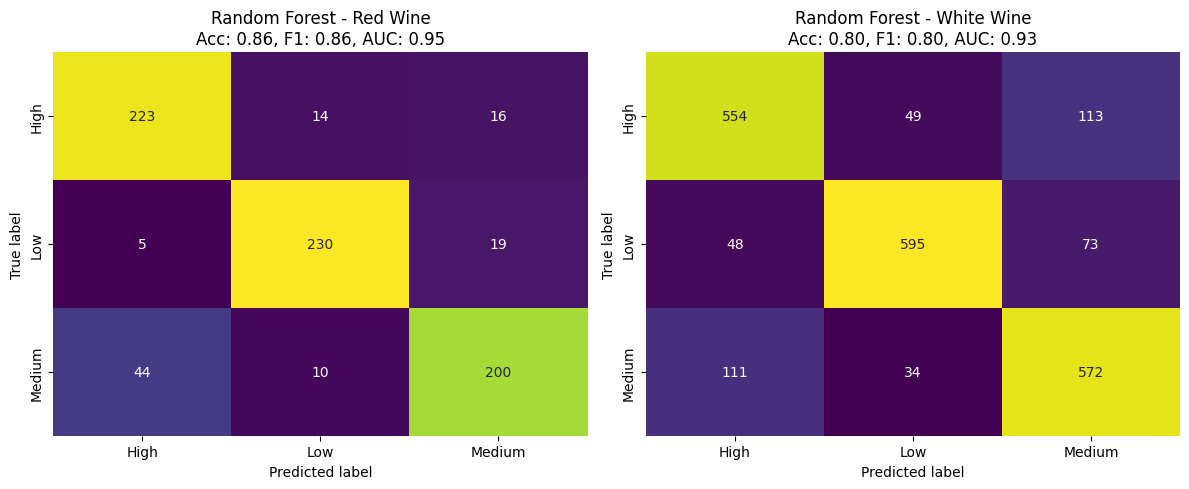

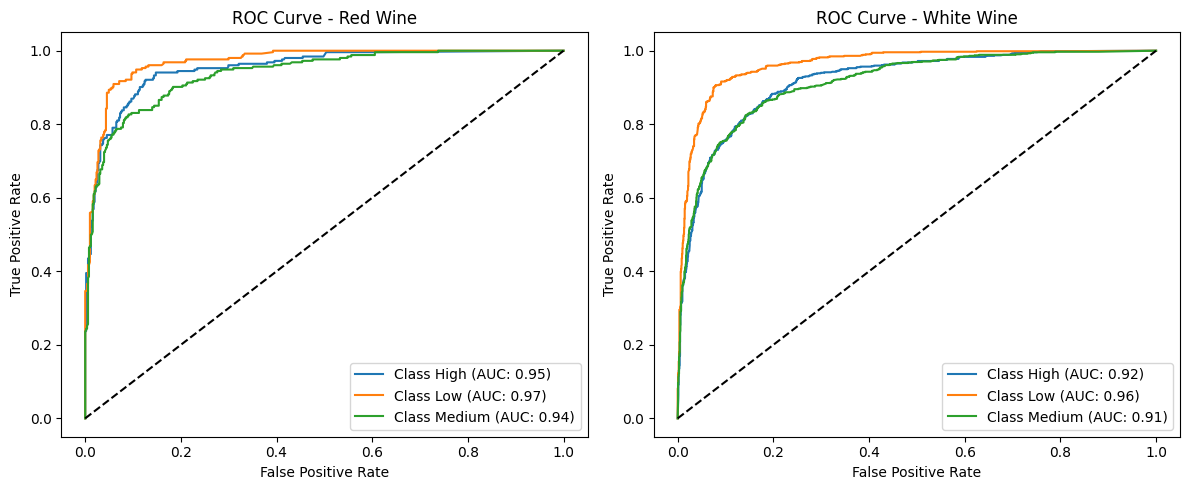

In [8]:

from sklearn.ensemble import RandomForestClassifier

# --- Hyperparameters for Random Forest ---
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# ---------------- RED WINE ----------------
print("\n=== Random Forest GridSearchCV - Red Wine ===")
grid_rf_red = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
grid_rf_red.fit(Xr_train, yr_train)

best_rf_red = grid_rf_red.best_estimator_
y_pred_rf_red = best_rf_red.predict(Xr_test)
cm_rf_red = confusion_matrix(yr_test, y_pred_rf_red)
acc_rf_red = best_rf_red.score(Xr_test, yr_test)
f1_rf_red = f1_score(yr_test, y_pred_rf_red, average='macro')

print("Best RF Params - Red:", grid_rf_red.best_params_)
print("Best Accuracy Score (CV) - Red:", grid_rf_red.best_score_)
print("Test Accuracy - Red:", acc_rf_red)
print("Test F1 Score - Red:", f1_rf_red)
print("Classification Report - Red:\n", classification_report(yr_test, y_pred_rf_red))

# --- ROC-AUC for Red Wine ---
classes_red = sorted(yr_test.unique())
yr_test_binarized = label_binarize(yr_test, classes=classes_red)
y_pred_proba_rf_red = best_rf_red.predict_proba(Xr_test)
roc_auc_rf_red = roc_auc_score(yr_test_binarized, y_pred_proba_rf_red, average='macro', multi_class='ovr')

# ---------------- WHITE WINE ----------------
print("\n=== Random Forest GridSearchCV - White Wine ===")
grid_rf_white = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
grid_rf_white.fit(Xw_train, yw_train)

best_rf_white = grid_rf_white.best_estimator_
y_pred_rf_white = best_rf_white.predict(Xw_test)
cm_rf_white = confusion_matrix(yw_test, y_pred_rf_white)
acc_rf_white = best_rf_white.score(Xw_test, yw_test)
f1_rf_white = f1_score(yw_test, y_pred_rf_white, average='macro')

print("Best RF Params - White:", grid_rf_white.best_params_)
print("Best Accuracy Score (CV) - White:", grid_rf_white.best_score_)
print("Test Accuracy - White:", acc_rf_white)
print("Test F1 Score - White:", f1_rf_white)
print("Classification Report - White:\n", classification_report(yw_test, y_pred_rf_white))

# --- ROC-AUC for White Wine ---
classes_white = sorted(yw_test.unique())
yw_test_binarized = label_binarize(yw_test, classes=classes_white)
y_pred_proba_rf_white = best_rf_white.predict_proba(Xw_test)
roc_auc_rf_white = roc_auc_score(yw_test_binarized, y_pred_proba_rf_white, average='macro', multi_class='ovr')

# --- CONFUSION MATRIX PLOTS ---
labels = ['High', 'Low', 'Medium']
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Red Wine Heatmap
sns.heatmap(cm_rf_red, annot=True, fmt='d', cmap='viridis',
            xticklabels=labels, yticklabels=labels, cbar=False, ax=axes[0])
axes[0].set_title(f'Random Forest - Red Wine\nAcc: {acc_rf_red:.2f}, F1: {f1_rf_red:.2f}, AUC: {roc_auc_rf_red:.2f}')
axes[0].set_xlabel('Predicted label')
axes[0].set_ylabel('True label')

# White Wine Heatmap
sns.heatmap(cm_rf_white, annot=True, fmt='d', cmap='viridis',
            xticklabels=labels, yticklabels=labels, cbar=False, ax=axes[1])
axes[1].set_title(f'Random Forest - White Wine\nAcc: {acc_rf_white:.2f}, F1: {f1_rf_white:.2f}, AUC: {roc_auc_rf_white:.2f}')
axes[1].set_xlabel('Predicted label')
axes[1].set_ylabel('True label')

plt.tight_layout()
plt.show()

# --- ROC CURVE PLOTS ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# RED Wine ROC Curve
for i, class_label in enumerate(classes_red):
    fpr, tpr, _ = roc_curve(yr_test_binarized[:, i], y_pred_proba_rf_red[:, i])
    auc_score = auc(fpr, tpr)
    axes[0].plot(fpr, tpr, label=f'Class {class_label} (AUC: {auc_score:.2f})')

axes[0].plot([0, 1], [0, 1], 'k--')
axes[0].set_title('ROC Curve - Red Wine')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].legend()

# WHITE Wine ROC Curve
for i, class_label in enumerate(classes_white):
    fpr, tpr, _ = roc_curve(yw_test_binarized[:, i], y_pred_proba_rf_white[:, i])
    auc_score = auc(fpr, tpr)
    axes[1].plot(fpr, tpr, label=f'Class {class_label} (AUC: {auc_score:.2f})')

axes[1].plot([0, 1], [0, 1], 'k--')
axes[1].set_title('ROC Curve - White Wine')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].legend()

plt.tight_layout()
plt.show()




=== Logistic Regression GridSearchCV - Red Wine ===
Best Logistic Params - Red: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best F1 Score (CV) - Red: 0.6142416049541103
Test Accuracy - Red: 0.6268068331143233
Test F1 Score - Red: 0.6125208910562036
Classification Report - Red:
               precision    recall  f1-score   support

        High       0.69      0.76      0.72       253
         Low       0.63      0.76      0.69       254
      Medium       0.52      0.36      0.43       254

    accuracy                           0.63       761
   macro avg       0.61      0.63      0.61       761
weighted avg       0.61      0.63      0.61       761


=== Logistic Regression GridSearchCV - White Wine ===
Best Logistic Params - White: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best F1 Score (CV) - White: 0.46345446427913056
Test Accuracy - White: 0.48859934853420195
Test F1 Score - White: 0.4723464116975409
Classification Report - White:
               precision    recall  f1-scor

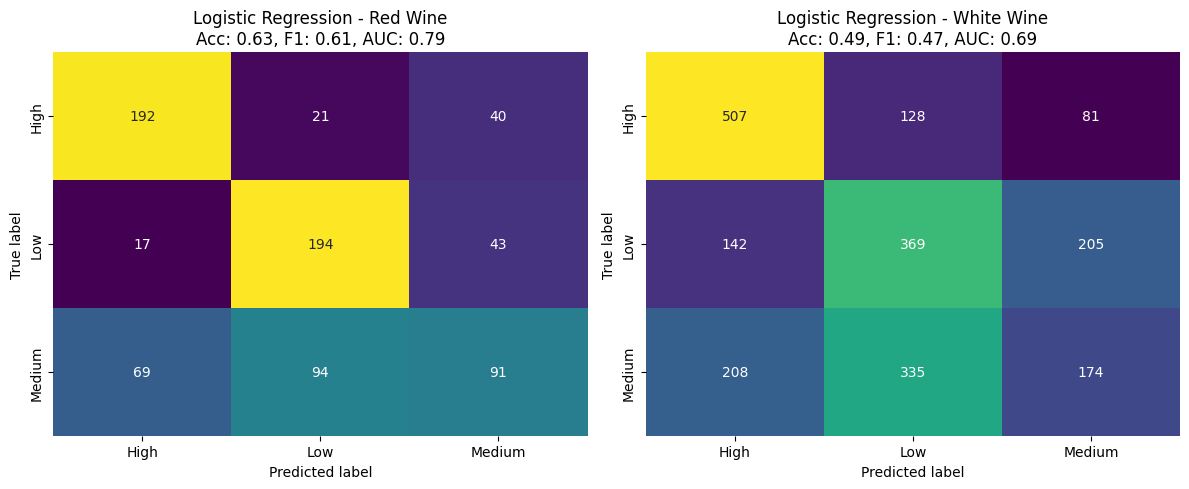

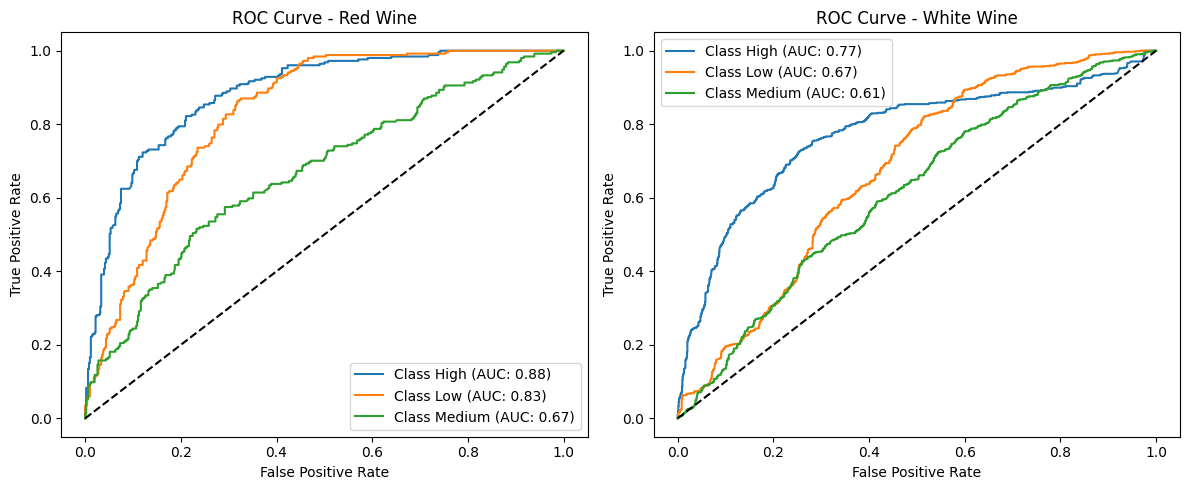

In [9]:
from sklearn.linear_model import LogisticRegression


# --- Logistic Regression Hyperparameters ---
logreg_params = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

# ---------------- RED WINE ----------------
print("\n=== Logistic Regression GridSearchCV - Red Wine ===")
grid_logreg_red = GridSearchCV(
    LogisticRegression(max_iter=1000),
    logreg_params,
    cv=StratifiedKFold(n_splits=5),
    scoring='f1_macro'
)
grid_logreg_red.fit(Xr_train, yr_train)

best_logreg_red = grid_logreg_red.best_estimator_
y_pred_logreg_red = best_logreg_red.predict(Xr_test)
cm_logreg_red = confusion_matrix(yr_test, y_pred_logreg_red)
acc_logreg_red = best_logreg_red.score(Xr_test, yr_test)
f1_logreg_red = f1_score(yr_test, y_pred_logreg_red, average='macro')

print("Best Logistic Params - Red:", grid_logreg_red.best_params_)
print("Best F1 Score (CV) - Red:", grid_logreg_red.best_score_)
print("Test Accuracy - Red:", acc_logreg_red)
print("Test F1 Score - Red:", f1_logreg_red)
print("Classification Report - Red:\n", classification_report(yr_test, y_pred_logreg_red))

# --- ROC-AUC Red Wine ---
classes_red = sorted(yr_test.unique())
yr_test_binarized = label_binarize(yr_test, classes=classes_red)
y_pred_proba_logreg_red = best_logreg_red.predict_proba(Xr_test)
roc_auc_logreg_red = roc_auc_score(yr_test_binarized, y_pred_proba_logreg_red, average='macro', multi_class='ovr')

# ---------------- WHITE WINE ----------------
print("\n=== Logistic Regression GridSearchCV - White Wine ===")
grid_logreg_white = GridSearchCV(
    LogisticRegression(max_iter=1000),
    logreg_params,
    cv=StratifiedKFold(n_splits=5),
    scoring='f1_macro'
)
grid_logreg_white.fit(Xw_train, yw_train)

best_logreg_white = grid_logreg_white.best_estimator_
y_pred_logreg_white = best_logreg_white.predict(Xw_test)
cm_logreg_white = confusion_matrix(yw_test, y_pred_logreg_white)
acc_logreg_white = best_logreg_white.score(Xw_test, yw_test)
f1_logreg_white = f1_score(yw_test, y_pred_logreg_white, average='macro')

print("Best Logistic Params - White:", grid_logreg_white.best_params_)
print("Best F1 Score (CV) - White:", grid_logreg_white.best_score_)
print("Test Accuracy - White:", acc_logreg_white)
print("Test F1 Score - White:", f1_logreg_white)
print("Classification Report - White:\n", classification_report(yw_test, y_pred_logreg_white))

# --- ROC-AUC White Wine ---
classes_white = sorted(yw_test.unique())
yw_test_binarized = label_binarize(yw_test, classes=classes_white)
y_pred_proba_logreg_white = best_logreg_white.predict_proba(Xw_test)
roc_auc_logreg_white = roc_auc_score(yw_test_binarized, y_pred_proba_logreg_white, average='macro', multi_class='ovr')

# --- CONFUSION MATRIX PLOTS (Seaborn Style) ---
labels = ['High', 'Low', 'Medium']
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Red Wine Heatmap
sns.heatmap(cm_logreg_red, annot=True, fmt='d', cmap='viridis',
            xticklabels=labels, yticklabels=labels, cbar=False, ax=axes[0])
axes[0].set_title(f'Logistic Regression - Red Wine\nAcc: {acc_logreg_red:.2f}, F1: {f1_logreg_red:.2f}, AUC: {roc_auc_logreg_red:.2f}')
axes[0].set_xlabel('Predicted label')
axes[0].set_ylabel('True label')

# White Wine Heatmap
sns.heatmap(cm_logreg_white, annot=True, fmt='d', cmap='viridis',
            xticklabels=labels, yticklabels=labels, cbar=False, ax=axes[1])
axes[1].set_title(f'Logistic Regression - White Wine\nAcc: {acc_logreg_white:.2f}, F1: {f1_logreg_white:.2f}, AUC: {roc_auc_logreg_white:.2f}')
axes[1].set_xlabel('Predicted label')
axes[1].set_ylabel('True label')

plt.tight_layout()
plt.show()

# --- ROC CURVE PLOTS ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# RED Wine ROC
for i, class_label in enumerate(classes_red):
    fpr, tpr, _ = roc_curve(yr_test_binarized[:, i], y_pred_proba_logreg_red[:, i])
    auc_score = auc(fpr, tpr)
    axes[0].plot(fpr, tpr, label=f'Class {class_label} (AUC: {auc_score:.2f})')

axes[0].plot([0, 1], [0, 1], 'k--')
axes[0].set_title('ROC Curve - Red Wine')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].legend()

# WHITE Wine ROC
for i, class_label in enumerate(classes_white):
    fpr, tpr, _ = roc_curve(yw_test_binarized[:, i], y_pred_proba_logreg_white[:, i])
    auc_score = auc(fpr, tpr)
    axes[1].plot(fpr, tpr, label=f'Class {class_label} (AUC: {auc_score:.2f})')

axes[1].plot([0, 1], [0, 1], 'k--')
axes[1].set_title('ROC Curve - White Wine')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].legend()

plt.tight_layout()
plt.show()


=== Linear Regression - Red Wine ===
MAE: 0.510
MSE: 0.434
RMSE: 0.659
R² Score: 0.296


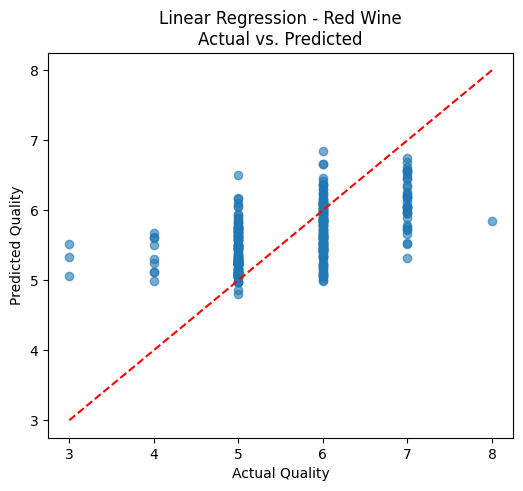


=== Linear Regression - White Wine ===
MAE: 0.663
MSE: 0.722
RMSE: 0.850
R² Score: 0.158


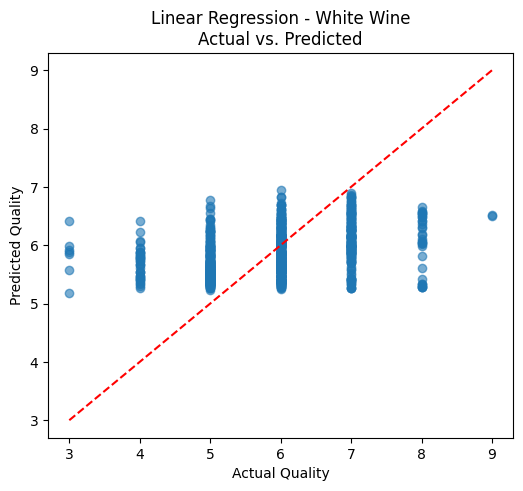

In [10]:
#linearRegressions
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# ---------------- RED WINE ----------------
print("\n=== Linear Regression - Red Wine ===")

# Use continuous quality scores
X_red_reg = red_clean[['alcohol', 'sulphates']]
y_red_reg = red_clean['quality']

# Train-test split
Xr_train_reg, Xr_test_reg, yr_train_reg, yr_test_reg = train_test_split(X_red_reg, y_red_reg, test_size=0.2, random_state=42)

# Train Linear Regression
linreg_red = LinearRegression()
linreg_red.fit(Xr_train_reg, yr_train_reg)
y_pred_red_reg = linreg_red.predict(Xr_test_reg)

# Metrics
mae_red = mean_absolute_error(yr_test_reg, y_pred_red_reg)
mse_red = mean_squared_error(yr_test_reg, y_pred_red_reg)
rmse_red = np.sqrt(mse_red)
r2_red = r2_score(yr_test_reg, y_pred_red_reg)

print(f"MAE: {mae_red:.3f}")
print(f"MSE: {mse_red:.3f}")
print(f"RMSE: {rmse_red:.3f}")
print(f"R² Score: {r2_red:.3f}")

# Scatter Plot
plt.figure(figsize=(6,5))
plt.scatter(yr_test_reg, y_pred_red_reg, alpha=0.6)
plt.plot([min(yr_test_reg), max(yr_test_reg)], [min(yr_test_reg), max(yr_test_reg)], 'r--')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Linear Regression - Red Wine\nActual vs. Predicted')
plt.show()

# ---------------- WHITE WINE ----------------
print("\n=== Linear Regression - White Wine ===")

# Use continuous quality scores
X_white_reg = white_clean[['alcohol', 'sulphates']]
y_white_reg = white_clean['quality']

# Train-test split
Xw_train_reg, Xw_test_reg, yw_train_reg, yw_test_reg = train_test_split(X_white_reg, y_white_reg, test_size=0.2, random_state=42)

# Train Linear Regression
linreg_white = LinearRegression()
linreg_white.fit(Xw_train_reg, yw_train_reg)
y_pred_white_reg = linreg_white.predict(Xw_test_reg)

# Metrics
mae_white = mean_absolute_error(yw_test_reg, y_pred_white_reg)
mse_white = mean_squared_error(yw_test_reg, y_pred_white_reg)
rmse_white = np.sqrt(mse_white)
r2_white = r2_score(yw_test_reg, y_pred_white_reg)

print(f"MAE: {mae_white:.3f}")
print(f"MSE: {mse_white:.3f}")
print(f"RMSE: {rmse_white:.3f}")
print(f"R² Score: {r2_white:.3f}")

# Scatter Plot
plt.figure(figsize=(6,5))
plt.scatter(yw_test_reg, y_pred_white_reg, alpha=0.6)
plt.plot([min(yw_test_reg), max(yw_test_reg)], [min(yw_test_reg), max(yw_test_reg)], 'r--')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Linear Regression - White Wine\nActual vs. Predicted')
plt.show()